In [31]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import sys

sys.path.append("creation_functions")

In [38]:
collapsed_dataset = pd.read_csv("collapsed_dataset.csv", index_col=0)

In [39]:
new_dataset = collapsed_dataset.loc[(collapsed_dataset["subject"] != 5) | (collapsed_dataset["trial"] != 13)]

In [40]:
only_numeric_dataset = new_dataset.drop(["trial", "subject"], axis=1)
only_numeric_dataset.corr()

,gravity.x_mean,gravity.x_std,gravity.x_range,gravity.x_IRQ,gravity.x_kurtosis,gravity.x_skewness,gravity.y_mean,gravity.y_std,gravity.y_range,gravity.y_IRQ,...,userAcceleration.zX#1,userAcceleration.zX#2,userAcceleration.zX#3,userAcceleration.zX#4,userAcceleration.zX#5,userAcceleration.zP#1,userAcceleration.zP#2,userAcceleration.zP#3,userAcceleration.zP#4,userAcceleration.zP#5
gravity.x_mean,1.000000,0.016561,0.009314,0.017947,0.019553,-0.046478,-0.128776,0.015220,0.013144,0.031743,...,0.022229,0.013905,0.004735,0.010453,0.014824,-0.039695,-0.074237,-0.063265,-0.044711,-0.012894
gravity.x_std,0.016561,1.000000,0.984155,0.978484,-0.238208,-0.059712,0.309818,0.655430,0.675386,0.601187,...,-0.079352,-0.116092,-0.113880,-0.109952,-0.106300,0.511614,0.555489,0.546274,0.509989,0.547215
gravity.x_range,0.009314,0.984155,1.000000,0.935004,-0.189496,-0.065203,0.328926,0.671099,0.700087,0.604587,...,-0.077896,-0.120234,-0.117867,-0.114838,-0.111112,0.548941,0.591850,0.581149,0.546168,0.581500
gravity.x_IRQ,0.017947,0.978484,0.935004,1.000000,-0.294010,-0.042182,0.285499,0.626957,0.638324,0.588997,...,-0.078436,-0.108513,-0.105939,-0.100439,-0.097628,0.483969,0.520769,0.513465,0.477602,0.518145
gravity.x_kurtosis,0.019553,-0.238208,-0.189496,-0.294010,1.000000,-0.028357,-0.130751,-0.160395,-0.147186,-0.179219,...,0.057651,0.089485,0.097008,0.094869,0.100036,-0.123612,-0.149925,-0.136382,-0.127872,-0.133528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
userAcceleration.zP#1,-0.039695,0.511614,0.548941,0.483969,-0.123612,-0.022135,0.241560,0.458531,0.483685,0.418591,...,0.071110,0.063128,0.059776,0.058962,0.050528,1.000000,0.643526,0.802744,0.745531,0.698021
userAcceleration.zP#2,-0.074237,0.555489,0.591850,0.520769,-0.149925,-0.035172,0.312119,0.505781,0.517634,0.499143,...,-0.148744,-0.178209,-0.162076,-0.174390,-0.169491,0.643526,1.000000,0.802055,0.819984,0.744747
userAcceleration.zP#3,-0.063265,0.546274,0.581149,0.513465,-0.136382,-0.037677,0.282332,0.463619,0.478911,0.449240,...,-0.070332,-0.098292,-0.081889,-0.065920,-0.068090,0.802744,0.802055,1.000000,0.807114,0.725182
userAcceleration.zP#4,-0.044711,0.509989,0.546168,0.477602,-0.127872,-0.043008,0.276397,0.455596,0.467522,0.458721,...,-0.108534,-0.133322,-0.137354,-0.125518,-0.108377,0.745531,0.819984,0.807114,1.000000,0.763759


In [41]:
# Create correlation matrix
corr_matrix = only_numeric_dataset.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
# Drop features
to_drop

['gravity.x_range',
 'gravity.x_IRQ',
 'gravity.y_range',
 'gravity.y_IRQ',
 'gravity.z_range',
 'gravity.z_IRQ',
 'rotationRate.x_range',
 'rotationRate.x_IRQ',
 'rotationRate.y_range',
 'rotationRate.y_IRQ',
 'rotationRate.z_range',
 'rotationRate.z_IRQ',
 'userAcceleration.x_range',
 'userAcceleration.x_IRQ',
 'userAcceleration.y_range',
 'userAcceleration.y_IRQ',
 'userAcceleration.z_range',
 'userAcceleration.z_IRQ',
 'gravity.yP#1',
 'gravity.zP#1',
 'rotationRate.xP#1']

In [45]:
only_numeric_dataset_filtered = only_numeric_dataset.drop(to_drop, axis=1)

In [46]:
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder

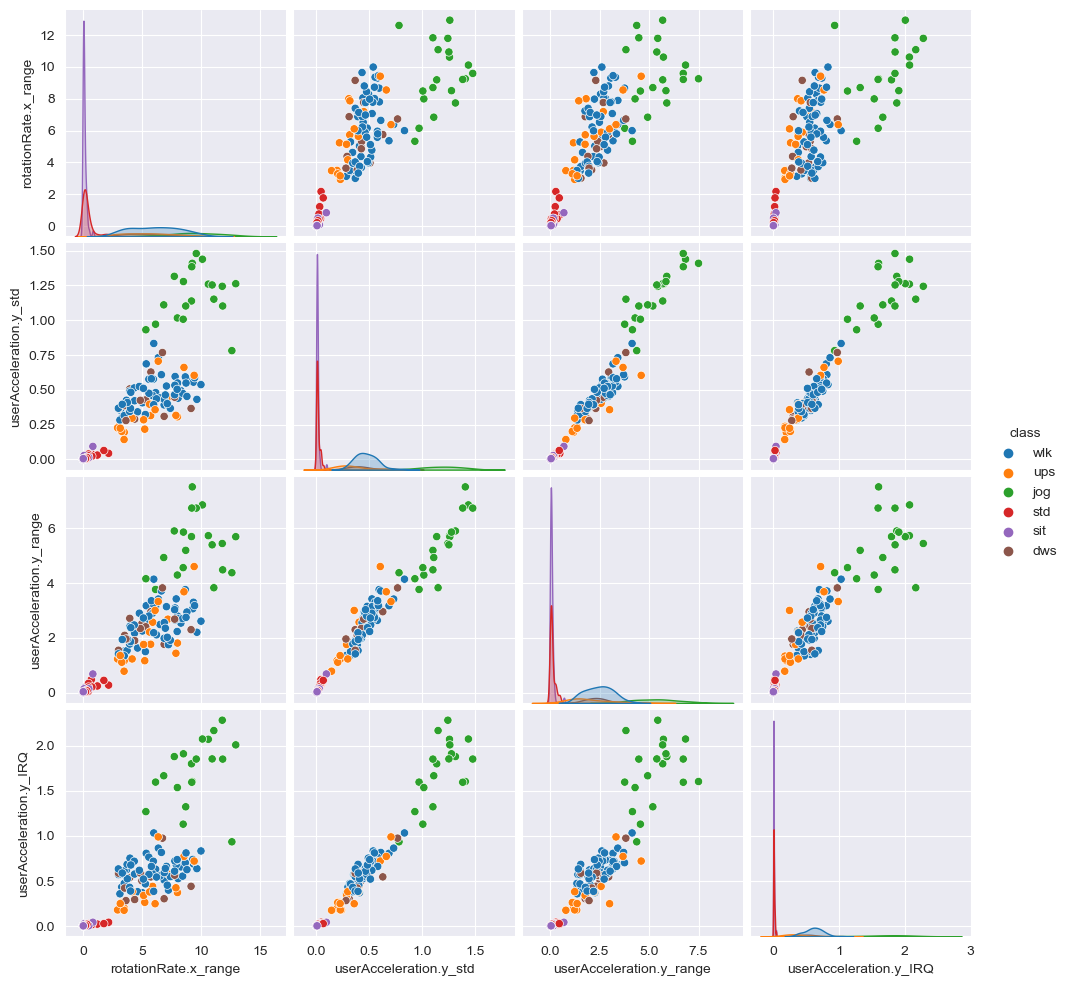

In [47]:
encoder=LabelEncoder()
feature_sel = SelectKBest(k=4).fit(only_numeric_dataset.drop("class", axis=1), encoder.fit_transform(only_numeric_dataset["class"]))
selected_features=feature_sel.get_support(indices=True)
selected_features=np.append(selected_features, 144)

test1 =only_numeric_dataset.iloc[:, selected_features]

sns.pairplot(data=test1.sample(n=200), hue="class")

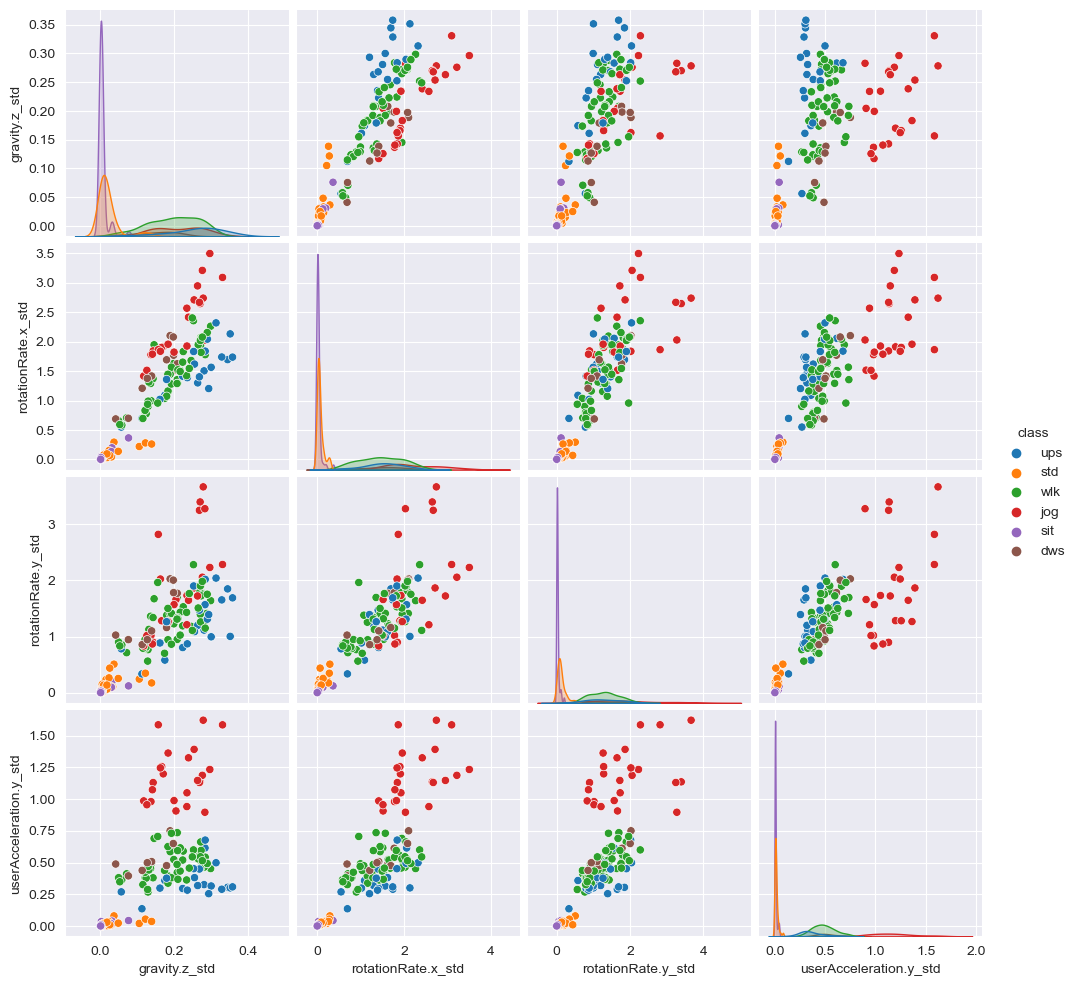

In [48]:
encoder=LabelEncoder()
feature_sel = SelectKBest(k=4).fit(only_numeric_dataset_filtered.drop("class", axis=1), encoder.fit_transform(only_numeric_dataset_filtered["class"]))
selected_features=feature_sel.get_support(indices=True)
selected_features=np.append(selected_features, 123)

test1 =only_numeric_dataset_filtered.iloc[:, selected_features]

sns.pairplot(data=test1.sample(n=200), hue="class")

In [49]:
print(only_numeric_dataset_filtered.shape)
dropped = only_numeric_dataset_filtered.drop_duplicates()
print(dropped.shape)

(8855, 124)
(8788, 124)


In [55]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import seaborn as sns
import numpy as np
from creation_functions.utilities import preprocessing

In [58]:
df_3secs = preprocessing(pd.read_csv("df_3secs.csv"))[0]
df_5secs = preprocessing(pd.read_csv("df_5secs.csv"))[0]
df_7secs = preprocessing(pd.read_csv("df_7secs.csv"))[0]

C:\Users\angel\anacondaTrue\envs\aideLAB\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\angel\anacondaTrue\envs\aideLAB\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\angel\anacondaTrue\envs\aideLAB\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\angel\anacondaTrue\envs\aideLAB\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\angel\anacondaTrue\envs\aideLAB\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [0] are constant.
  war

[Text(0.5, 0, 'Window size'),
 Text(0, 0.5, 'Accuracy'),
 Text(0.5, 1.0, "Accuracy when window's size varies")]

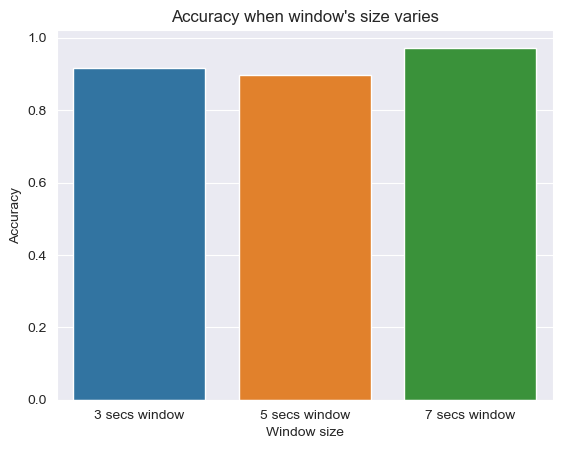

In [59]:
knn_pipe=Pipeline([
    ("scaler", RobustScaler()),
    ("sampling", SMOTE()),
    ("feature-selector", SelectKBest(k=10)),
    ("classifier", KNeighborsClassifier(n_neighbors=5))
])

res_3_secs = np.mean(cross_val_score(knn_pipe, df_3secs.drop("class", axis=1), df_3secs["class"], cv=KFold(5, shuffle=True, random_state=123)))
res_5_secs = np.mean(cross_val_score(knn_pipe, df_5secs.drop("class", axis=1), df_5secs["class"], cv=KFold(5, shuffle=True, random_state=123)))
res_7_secs = np.mean(cross_val_score(knn_pipe, df_7secs.drop("class", axis=1), df_7secs["class"], cv=KFold(5, shuffle=True, random_state=123)))


ax=sns.barplot(x=["3 secs window","5 secs window", "7 secs window"], y=[res_3_secs, res_5_secs, res_7_secs])
ax.set(xlabel="Window size", ylabel="Accuracy", title="Accuracy when window's size varies")

In [60]:
print("Stronzatina")

Stronzatina


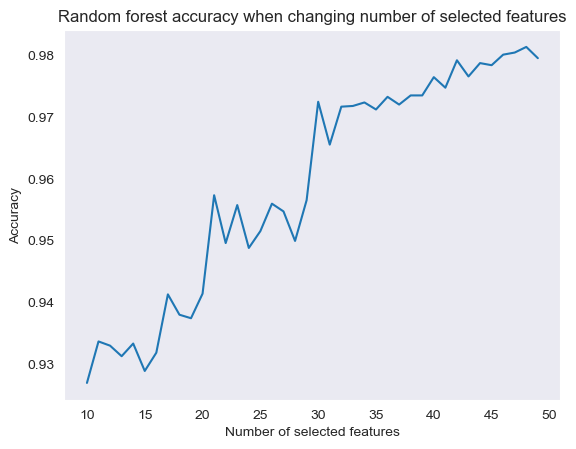

In [51]:

X=dropped.drop(["class"], axis=1)
y=dropped["class"]

results_list=[]

for k in range (10,50):
    pipe=Pipeline([
        ("scaler", RobustScaler()),
        ("sampling", SMOTE()),
        ("feature_selection",SelectKBest(k=k)),
        ("classifier", RandomForestClassifier(n_jobs=-1))
    ])
    results=cross_val_score(pipe, X, y, cv=KFold(5, shuffle=True, random_state=123),n_jobs=-1 )
    results_list.append(np.mean(results))

x=np.arange(10, 50)
plt.plot(x, results_list)
plt.xlabel("Number of selected features")
plt.ylabel("Accuracy")
plt.title("Random forest accuracy when changing number of selected features")
plt.grid()